<a href="https://colab.research.google.com/github/pavancos/curve/blob/main/CurveMain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Visualing and Identifying the curves

## Importing Packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from skimage.draw import ellipse
from scipy.optimize import least_squares
from skimage.measure import regionprops, label

## Load CSV data

In [4]:

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

# Plot data

In [5]:

def plot(paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = plt.cm.viridis(np.linspace(0, 1, len(paths_XYs)))
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    plt.show()

# Fit a line to points

In [6]:

def fit_line(points):
    X = points[:, 0].reshape(-1, 1)
    y = points[:, 1]
    model = LinearRegression().fit(X, y)
    return model.coef_[0], model.intercept_

# Detect straight lines

In [7]:

def detect_straight_lines(paths_XYs):
    for path in paths_XYs:
        for points in path:
            slope, intercept = fit_line(points)
            print(f"Detected line with slope: {slope}, intercept: {intercept}")

# Fit a circle to points

In [8]:

def fit_circle(points):
    def objective(params):
        xc, yc, r = params
        return np.sqrt((points[:, 0] - xc)**2 + (points[:, 1] - yc)**2) - r
            # Initial guess
    x_m = np.mean(points[:, 0])
    y_m = np.mean(points[:, 1])
    r_guess = np.mean(np.sqrt((points[:, 0] - x_m)**2 + (points[:, 1] - y_m)**2))
    initial_guess = [x_m, y_m, r_guess]

    result = least_squares(objective, initial_guess)
    xc, yc, r = result.x
    return xc, yc, r

# Detect circles

In [9]:

def detect_circles(paths_XYs):
    for path in paths_XYs:
        for points in path:
            xc, yc, r = fit_circle(points)
            print(f"Detected circle with center: ({xc}, {yc}), radius: {r}")

# Fit an ellipse to points

In [10]:

def fit_ellipse(points):
    from skimage.draw import ellipse_perimeter
    from skimage.measure import EllipseModel

    x = points[:, 0]
    y = points[:, 1]

    if len(x) < 5:
        return None

    model = EllipseModel()
    model.estimate(np.column_stack((x, y)))
    xc, yc, a, b, theta = model.params

    return xc, yc, a, b, theta

# Detect ellipses

In [11]:

def detect_ellipses(paths_XYs):
    for path in paths_XYs:
        for points in path:
            result = fit_ellipse(points)
            if result:
                xc, yc, a, b, theta = result
                print(f"Detected ellipse with center: ({xc}, {yc}), axes: ({a}, {b}), angle: {theta}")

# Detect rectangles (approximation)

In [12]:

def detect_rectangles(paths_XYs):
    for path in paths_XYs:
        for points in path:
            if len(points) >= 4:
                # Placeholder logic for detecting rectangles
                print("Detected potential rectangle")

# Detect regular polygons (approximation)

In [13]:

def detect_polygons(paths_XYs):
    for path in paths_XYs:
        for points in path:
            if len(points) >= 3:
                print("Detected potential polygon")

# Main

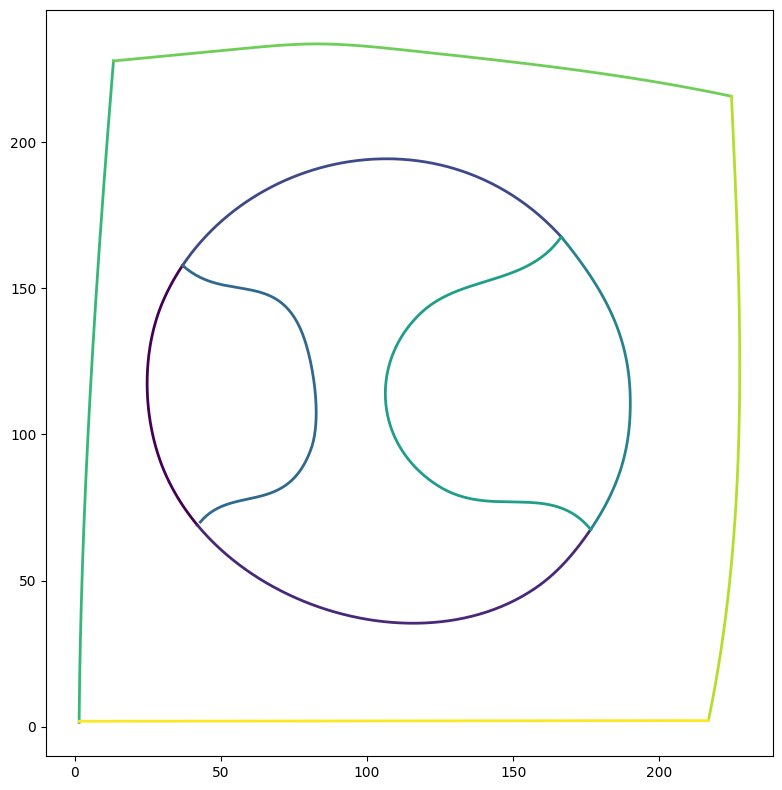

Detected line with slope: -1.8554965503132939, intercept: 167.86802889193012
Detected line with slope: -0.038687589837550204, intercept: 50.60680291402279
Detected line with slope: 0.08145946747469807, intercept: 175.2306832998962
Detected line with slope: -0.25348645626091615, intercept: 131.31110948183024
Detected line with slope: -2.1883069586951245, intercept: 520.2746535735113
Detected line with slope: -0.179859948267537, intercept: 136.5571325561847
Detected line with slope: 18.174525136362895, intercept: 5.398784144853991
Detected line with slope: -0.064707220866542, intercept: 235.50506216360046
Detected line with slope: 15.078528919666713, intercept: -3286.106466679529
Detected line with slope: 0.001073341490665822, intercept: 1.8743233100233543
Detected circle with center: (100.26763351543761, 116.9776987045931), radius: 75.58940568430408
Detected circle with center: (111.9255631899564, 121.81880401388611), radius: 86.52187601481639
Detected circle with center: (105.828202280

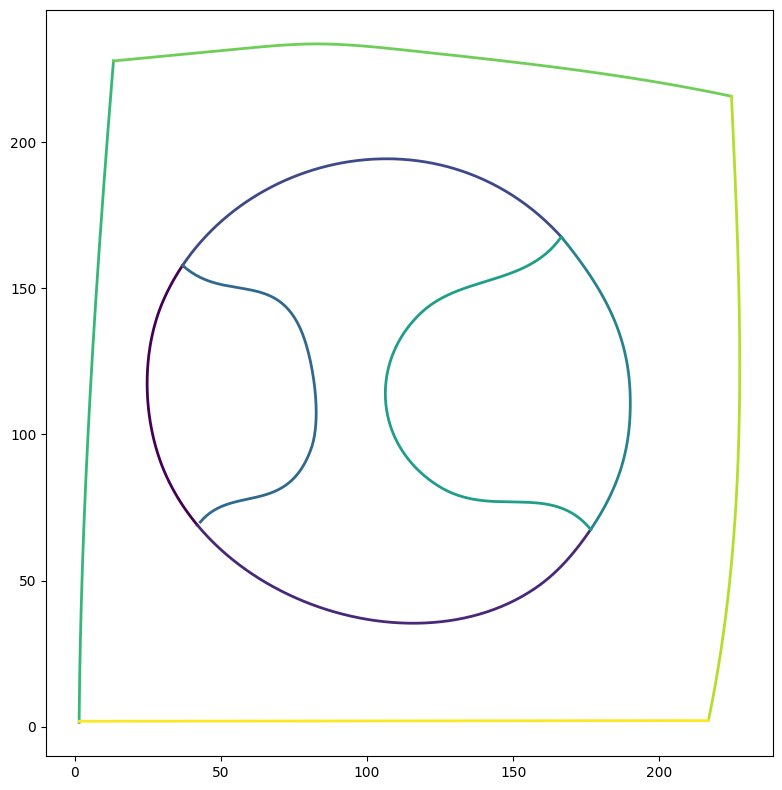

Detected line with slope: -1.8554965503132939, intercept: 167.86802889193012
Detected line with slope: -0.038687589837550204, intercept: 50.60680291402279
Detected line with slope: 0.08145946747469807, intercept: 175.2306832998962
Detected line with slope: -0.25348645626091615, intercept: 131.31110948183024
Detected line with slope: -2.1883069586951245, intercept: 520.2746535735113
Detected line with slope: -0.179859948267537, intercept: 136.5571325561847
Detected line with slope: 18.174525136362895, intercept: 5.398784144853991
Detected line with slope: -0.064707220866542, intercept: 235.50506216360046
Detected line with slope: 15.078528919666713, intercept: -3286.106466679529
Detected line with slope: 0.001073341490665822, intercept: 1.8743233100233543
Detected circle with center: (100.26763351543761, 116.9776987045931), radius: 75.58940568430408
Detected circle with center: (111.9255631899564, 121.81880401388611), radius: 86.52187601481639
Detected circle with center: (105.828202280

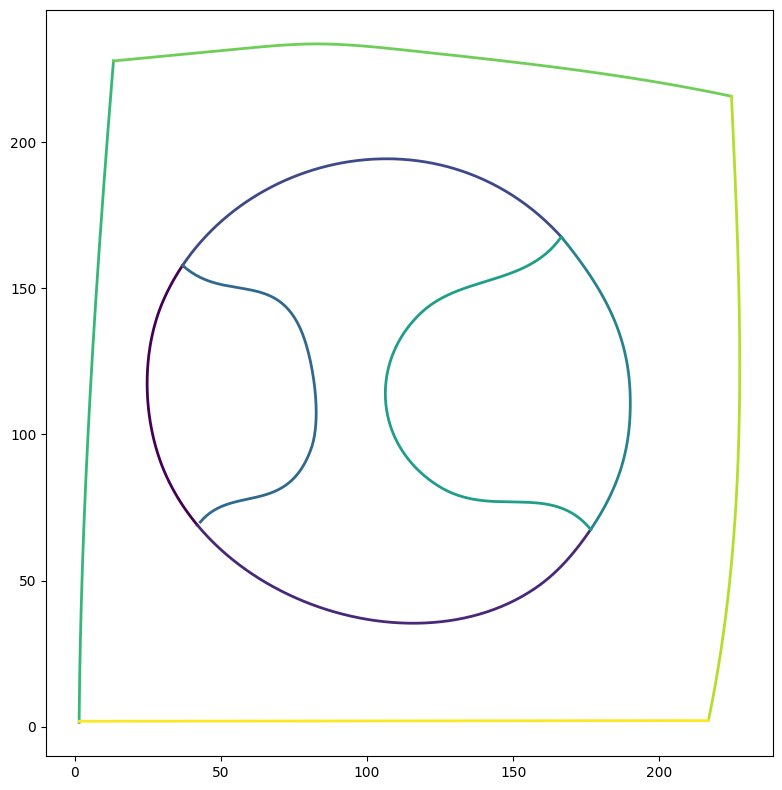

Detected line with slope: -1.8554965503132939, intercept: 167.86802889193012
Detected line with slope: -0.038687589837550204, intercept: 50.60680291402279
Detected line with slope: 0.08145946747469807, intercept: 175.2306832998962
Detected line with slope: -0.25348645626091615, intercept: 131.31110948183024
Detected line with slope: -2.1883069586951245, intercept: 520.2746535735113
Detected line with slope: -0.179859948267537, intercept: 136.5571325561847
Detected line with slope: 18.174525136362895, intercept: 5.398784144853991
Detected line with slope: -0.064707220866542, intercept: 235.50506216360046
Detected line with slope: 15.078528919666713, intercept: -3286.106466679529
Detected line with slope: 0.001073341490665822, intercept: 1.8743233100233543
Detected circle with center: (100.26763351543761, 116.9776987045931), radius: 75.58940568430408
Detected circle with center: (111.9255631899564, 121.81880401388611), radius: 86.52187601481639
Detected circle with center: (105.828202280

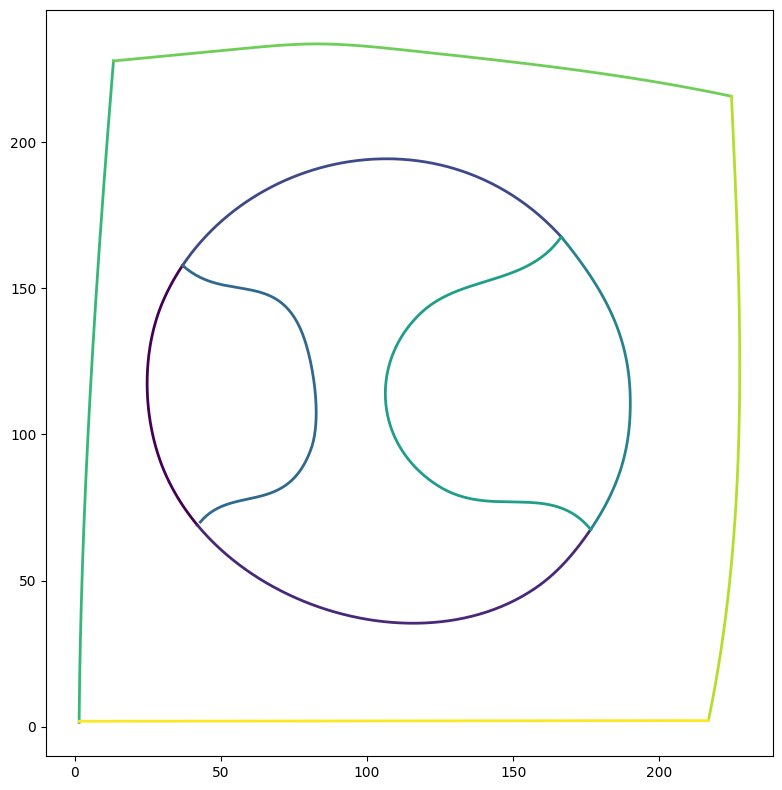

Detected line with slope: -1.8554965503132939, intercept: 167.86802889193012
Detected line with slope: -0.038687589837550204, intercept: 50.60680291402279
Detected line with slope: 0.08145946747469807, intercept: 175.2306832998962
Detected line with slope: -0.25348645626091615, intercept: 131.31110948183024
Detected line with slope: -2.1883069586951245, intercept: 520.2746535735113
Detected line with slope: -0.179859948267537, intercept: 136.5571325561847
Detected line with slope: 18.174525136362895, intercept: 5.398784144853991
Detected line with slope: -0.064707220866542, intercept: 235.50506216360046
Detected line with slope: 15.078528919666713, intercept: -3286.106466679529
Detected line with slope: 0.001073341490665822, intercept: 1.8743233100233543
Detected circle with center: (100.26763351543761, 116.9776987045931), radius: 75.58940568430408
Detected circle with center: (111.9255631899564, 121.81880401388611), radius: 86.52187601481639
Detected circle with center: (105.828202280

In [14]:

def main():
    csv_files=[
        '/content/drive/MyDrive/problems/frag0.csv',
        '/content/drive/MyDrive/problems/frag1.csv',
        '/content/drive/MyDrive/problems/frag2.csv',
        '/content/drive/MyDrive/problems/isolated.csv',
    ]
    for file_path in csv_files:

      file_path = '/content/drive/MyDrive/problems/frag0.csv'
      path_XYs = read_csv(file_path)

      # Visualize the input data
      plot(path_XYs)

      # Detect different shapes
      detect_straight_lines(path_XYs)
      detect_circles(path_XYs)
      detect_ellipses(path_XYs)
      detect_rectangles(path_XYs)
      detect_polygons(path_XYs)

if __name__ == '__main__':
    main()